In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('./Salary_dataset.csv',usecols=['YearsExperience','Salary'])
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Histogram

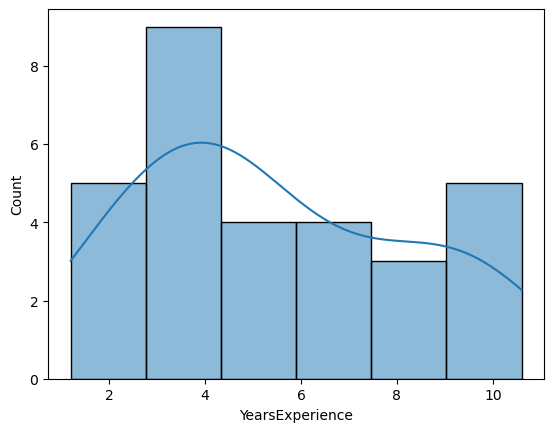

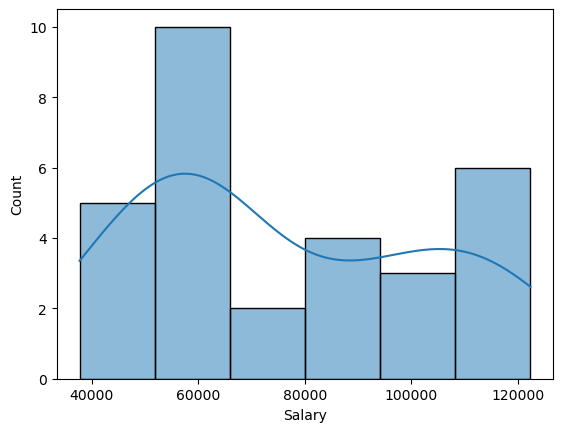

In [5]:
for i in data.columns:
    sns.histplot(x=data[i],kde=True)
    plt.show()

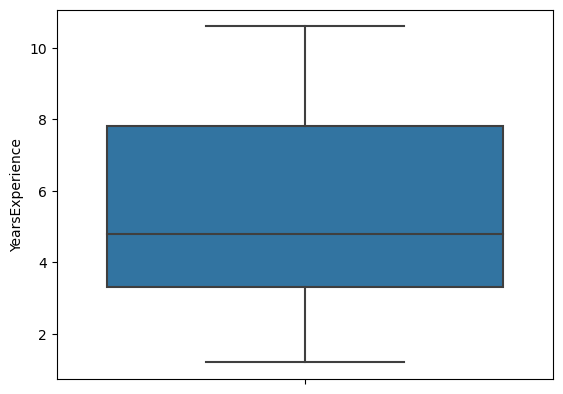

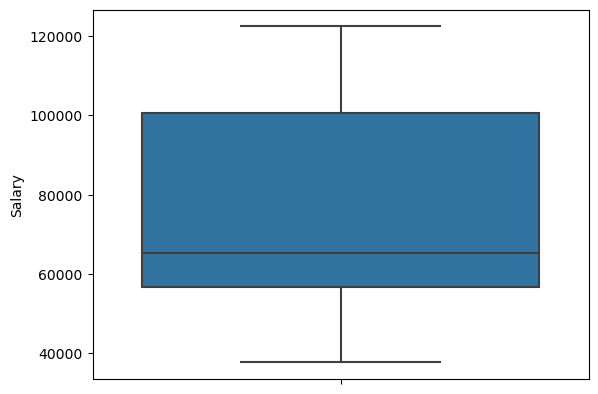

In [6]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

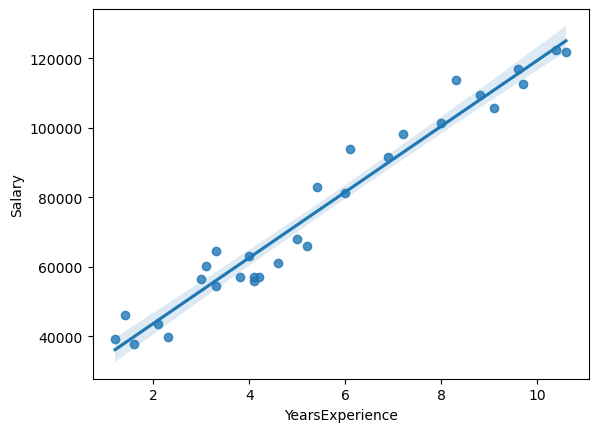

In [8]:
sns.regplot(data=data,x='YearsExperience',y='Salary')
plt.show()

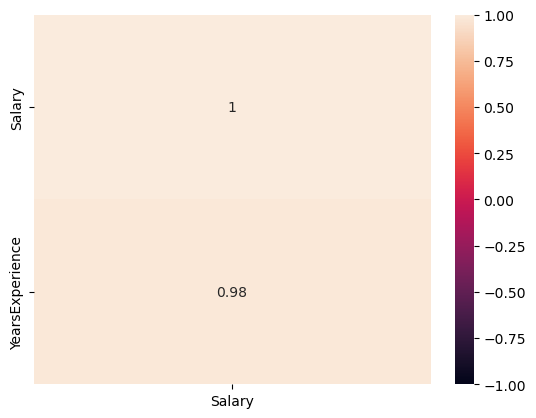

In [10]:
sns.heatmap(data.corr()[['Salary']].sort_values(by='Salary',ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

In [11]:
x = data.iloc[:,:-1].values

In [12]:
y = data.iloc[:,-1].values

In [13]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=56)

## Linear regression

In [16]:
LR_model = LinearRegression()

In [17]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = LR_model.predict(x_test)

In [19]:
y_pred

array([ 65016.18824973,  90497.68009949,  56522.35763314,  45197.25014436,
        63128.67033493, 125416.76152324])

In [20]:
r2_score(y_test,y_pred)

0.9804067424885895

In [22]:
LR_model.score(x_test,y_test)

0.9804067424885895

In [26]:
LR_model.score(x_train,y_train)

0.9504872715098404

In [27]:
mean_absolute_error(y_test,y_pred)

2759.534519340012

In [28]:
mean_squared_error(y_test,y_pred)

14027160.254194265

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

3745.2850698170178

In [33]:
OUTPUT_LR = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])
OUTPUT_LR.head()

,Actual,Prediction
0,57082.0,65016.188250
1,91739.0,90497.680099
2,54446.0,56522.357633
3,43526.0,45197.250144
4,63219.0,63128.670335


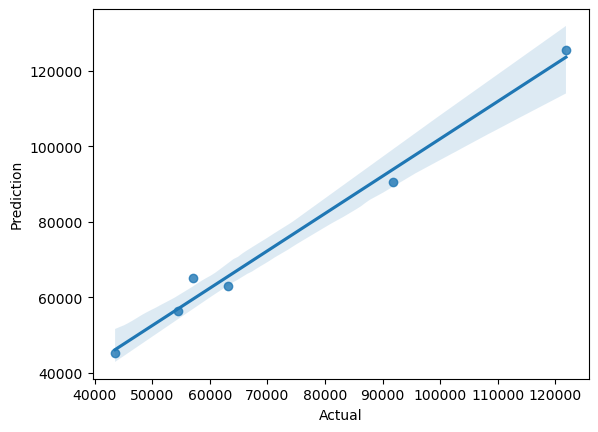

In [34]:
sns.regplot(data=OUTPUT_LR,x='Actual',y='Prediction')
plt.show()

## Lasso Regression

In [35]:
Lasso_model = Lasso()

In [36]:
Lasso_model.fit(x_train,y_train)

Lasso()

In [37]:
y_pred = Lasso_model.predict(x_test)

In [38]:
y_pred

array([ 65016.6471387 ,  90497.16403746,  56523.14150578,  45198.46732856,
        63129.2014425 , 125414.90941724])

In [39]:
r2_score(y_test,y_pred)

0.9804061208740001

In [40]:
Lasso_model.score(x_test,y_test)

0.9804061208740001

In [41]:
Lasso_model.score(x_train,y_train)

0.9504872701184076

In [42]:
mean_absolute_error(y_test,y_pred)

2759.633318387332

In [43]:
mean_squared_error(y_test,y_pred)

14027605.279094085

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

3745.344480697882

In [45]:
Lasso_output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])
Lasso_output.head()

,Actual,Prediction
0,57082.0,65016.647139
1,91739.0,90497.164037
2,54446.0,56523.141506
3,43526.0,45198.467329
4,63219.0,63129.201442


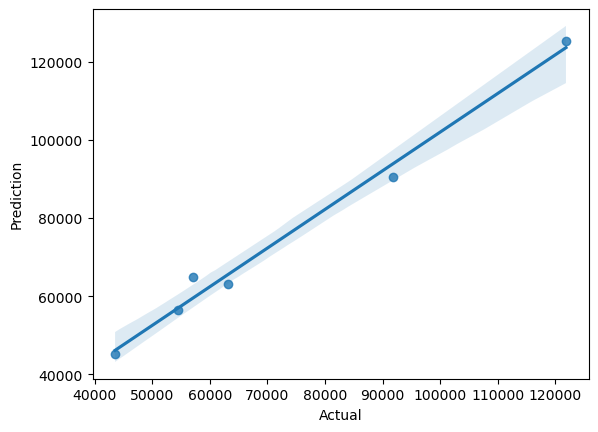

In [46]:
sns.regplot(data=Lasso_output,x='Actual',y='Prediction')
plt.show()

### Ridge Regression

In [47]:
Ridge_model = Ridge()

In [48]:
Ridge_model.fit(x_train,y_train)

Ridge()

In [49]:
y_pred = Ridge_model.predict(x_test)

In [50]:
y_pred

array([ 65499.39364442,  89954.27206546,  57347.76750407,  46478.93265027,
        63687.92116878, 123466.51286467])

In [51]:
r2_score(y_test,y_pred)

0.9781313310463213

In [53]:
Ridge_model.score(x_test,y_test)

0.9781313310463213

In [54]:
Ridge_model.score(x_train,y_train)

0.9489444684718609

In [55]:
mean_absolute_error(y_test,y_pred)

3019.875961124327

In [56]:
mean_squared_error(y_test,y_pred)

15656167.627079302

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

3956.7875387843737

In [58]:
Ridge_output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])
Ridge_output.head()

,Actual,Prediction
0,57082.0,65499.393644
1,91739.0,89954.272065
2,54446.0,57347.767504
3,43526.0,46478.932650
4,63219.0,63687.921169


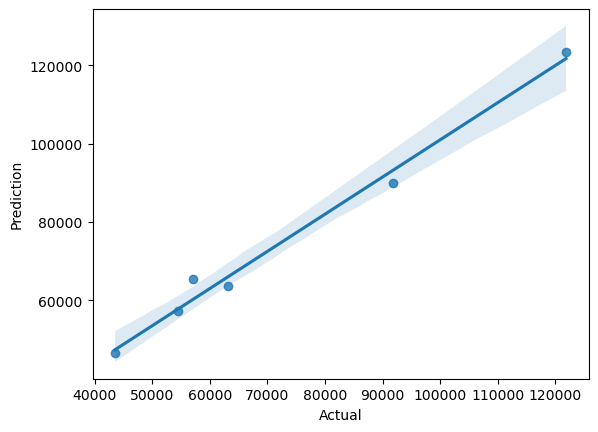

In [59]:
sns.regplot(data=Ridge_output,x='Actual',y='Prediction')
plt.show()

## AdaBoost Regression

In [60]:
ABR_model = AdaBoostRegressor()

In [61]:
ABR_model.fit(x_train,y_train)

AdaBoostRegressor()

In [62]:
y_pred = ABR_model.predict(x_test)

In [63]:
y_pred

array([ 59425.        ,  93941.        ,  60332.5       ,  39892.        ,
        59425.        , 118777.33333333])

In [64]:
r2_score(y_test,y_pred)

0.9808700364554673

In [65]:
ABR_model.score(x_test,y_test)

0.9808700364554673

In [66]:
ABR_model.score(x_train,y_train)

0.991953234017713

In [67]:
mean_absolute_error(y_test,y_pred)

3492.5277777777787

In [68]:
mean_squared_error(y_test,y_pred)

13695479.893518522

In [69]:
np.sqrt(mean_squared_error(y_test,y_pred))

3700.740452060712

In [72]:
ABR_output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])
ABR_output.head()

,Actual,Prediction
0,57082.0,59425.0
1,91739.0,93941.0
2,54446.0,60332.5
3,43526.0,39892.0
4,63219.0,59425.0


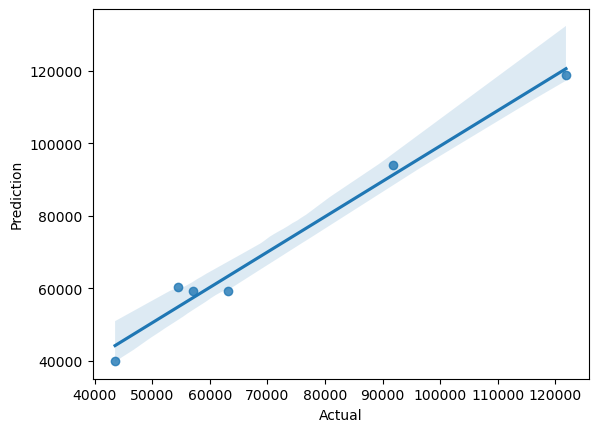

In [73]:
sns.regplot(data=ABR_output,x='Actual',y='Prediction')
plt.show()

### Gradient Boosting Regression

In [74]:
GBR_model = GradientBoostingRegressor()

In [75]:
GBR_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [77]:
y_pred = GBR_model.predict(x_test)
y_pred

array([ 56555.20695044,  98230.01078586,  64168.51794549,  39877.0831012 ,
        56555.20695044, 122268.79341592])

In [78]:
r2_score(y_test,y_pred)

0.9546466802123378

In [ ]:
GBR_model.